### ASTR 3300/5300-003: Astrostatistics
***N. Pol***
___

# Homework 4
### Due: Friday, Feb 21st at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainty in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [2]:
### import
import numpy as np

### read in data
data1 = np.load('hw_data/hw4_data_1.npy')
data2 = np.load('hw_data/hw4_data_2.npy')

### testing
print(data1)
print("========================================")
print(data2)

[[4.36 2.24]
 [4.   1.94]
 [4.87 1.39]
 [5.64 2.55]
 [6.14 1.69]
 [5.92 1.38]
 [3.93 1.  ]
 [6.58 1.6 ]
 [3.78 1.  ]
 [5.84 1.  ]]
[[ 0.42  0.72  0.    0.3   0.15  0.09  0.19  0.35  0.4   0.54  0.42  0.69
   0.2   0.88  0.03  0.67  0.42  0.56  0.14  0.2 ]
 [ 0.33  0.41 -0.25  0.01 -0.05 -0.05 -0.12  0.26  0.29  0.39  0.31  0.42
  -0.01  0.58 -0.2   0.52  0.15  0.32 -0.13 -0.09]
 [ 0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1 ]]


In [4]:
### each columns, sample mean and standard error
voltage = data1[:,0]
uncertainty = data1[:,1]

sample_mean = np.mean(voltage)
std_err_mean = np.sqrt(np.sum(uncertainty**2) / len(voltage))

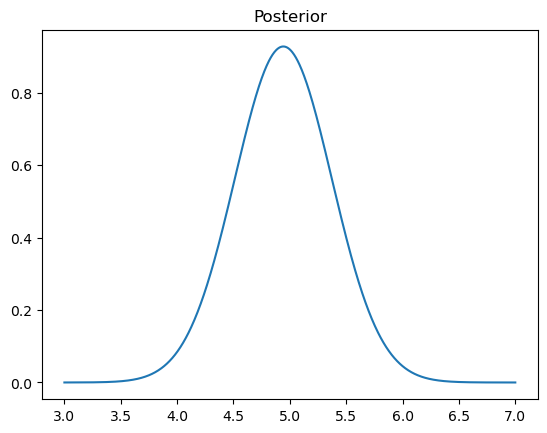

In [28]:
### imports
from scipy.optimize import minimize
import matplotlib.pyplot as plt

### likelihood
def log_likelihood(mu, data, uncertainty):
    voltage = data[:, 0]
    uncertainty = data[:, 1]
    function = -0.5 * np.sum((np.log(2 * np.pi) + 2 * np.log(uncertainty) + ((voltage - mu) ** 2) / uncertainty**2))
    return function

result = minimize(lambda mu: log_likelihood(mu, data1, uncertainty), x0=sample_mean)
best_fit = result.x[0]

### Bayesian posterior
### uniform prior
def uniform_prior(mu, lower=3, upper=7):
        function = 1 / (upper - lower)
        return function

### posterior
def posterior(mu, data, uncertainty):
    prior = uniform_prior(mu)
    function = np.exp(log_likelihood(mu, data, uncertainty)) * prior
    return function

mu_value = np.linspace(3, 7, 1000)
posterior_value = np.array([posterior(mu, data1, uncertainty) for mu in mu_value])
posterior_value /= np.sum(posterior_value) * (mu_value[1] - mu_value[0]) # normalise


### plot
plt.plot(mu_value, posterior_value)
plt.title('Posterior')
#plt.legend() << giving minor errors so commented out
plt.show()

### weeee it works!

In [30]:
### 4

cdf_value = np.cumsum(posterior_value) * (mu_value[1] - mu_value[0])
### for 68.3% >> ~0.16, 0.84
lower_bound = mu_value[np.searchsorted(cdf_value, 0.16)]
upper_bound = mu_value[np.searchsorted(cdf_value, 0.84)]

print(lower_bound, upper_bound)
## this gives you errors if not normalised... had to learn it hard way :(

4.513513513513514 5.37037037037037


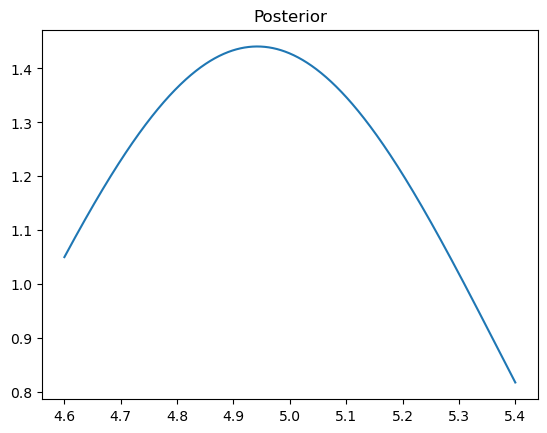

4.736136136136136 5.237437437437437


In [70]:
### 5 - code cells above but with 4.6, 5.4

### likelihood
def log_likelihood(mu, data, uncertainty):
    voltage = data[:, 0]
    uncertainty = data[:, 1]
    function = -0.5 * np.sum((np.log(2 * np.pi) + 2 * np.log(uncertainty) + ((voltage - mu) ** 2) / uncertainty**2))
    return function

result = minimize(lambda mu: log_likelihood(mu, data1, uncertainty), x0=sample_mean)
best_fit_mu = result.x[0]

### Bayesian posterior
### uniform prior
def uniform_prior(mu, lower=3, upper=7):
        function = 1 / (upper - lower)
        return function

### posterior
def posterior(mu, data, uncertainty):
    prior = uniform_prior(mu)
    function = np.exp(log_likelihood(mu, data, uncertainty)) * prior
    return function

mu_value = np.linspace(4.6, 5.4, 1000)
posterior_value = np.array([posterior(mu, data1, uncertainty) for mu in mu_value])
posterior_value /= np.sum(posterior_value) * (mu_value[1] - mu_value[0]) # normalise


### plot
plt.plot(mu_value, posterior_value)
plt.title('Posterior')
#plt.legend() << giving minor errors so commented out
plt.show()


### 4

cdf_value = np.cumsum(posterior_value) * (mu_value[1] - mu_value[0])
### for 68.3% >> ~0.16, 0.84
lower_bound = mu_value[np.searchsorted(cdf_value, 0.16)]
upper_bound = mu_value[np.searchsorted(cdf_value, 0.84)]

print(lower_bound, upper_bound)


### hmmm... I don't like the graph >:/ not as pretty as above

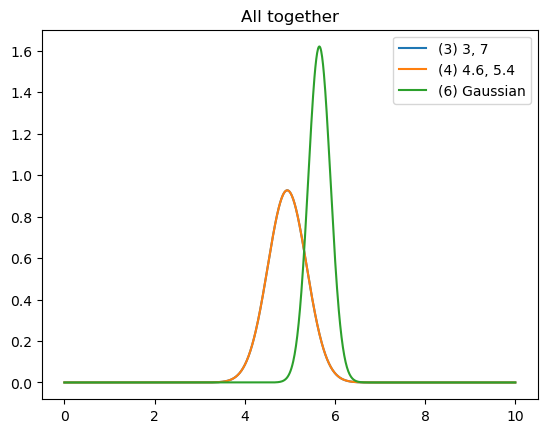

In [74]:
### 6
from scipy.stats import norm

### Gaussian prior
def gaussian_prior(mu, mean=6, std=0.3):
    return norm.pdf(mu, loc=mean, scale=std)

### Posterior for Gaussian
def posterior_gaussian(mu, data, uncertainty):
    prior = gaussian_prior(mu)
    return np.exp(log_likelihood(mu, data, uncertainty)) * prior

### plot all together
mu_value = np.linspace(0, 10, 1000)

### plot 3 (3, 7)
plot3 = np.array([posterior(mu, data1, uncertainty) for mu in mu_value])
plot3 /= np.sum(plot3) * (mu_value[1] - mu_value[0])

### plot 4 (4.6, 5.4)
plot4 = np.array([posterior(mu, data1, uncertainty) for mu in mu_value])
plot4 /= np.sum(plot4) * (mu_value[1] - mu_value[0])

### plot 6 (Gaussian)
plot_gaussian = np.array([posterior_gaussian(mu, data1, uncertainty) for mu in mu_value])
plot_gaussian /= np.sum(plot_gaussian) * (mu_value[1] - mu_value[0])

### plot
plt.plot(mu_value, plot3, label='(3) 3, 7')
plt.plot(mu_value, plot4, label='(4) 4.6, 5.4')
plt.plot(mu_value, plot_gaussian, label='(6) Gaussian')
plt.title('All together')
plt.legend()
plt.show()

# 3) and 4) are overlapping

<span style="color:red">NP: 4 should not look the same as #3. -1 pt.</span>

In [82]:
### 8

# Evidence under the delta function prior (at best-fit mu)
evidence_delta = np.exp(log_likelihood(best_fit_mu, data1, uncertainty))

### 3
evidence_uniform3 = np.sum(plot3) * (mu_value[1] - mu_value[0])
bayes_factor3 = evidence_delta / evidence_uniform3
print(evidence_uniform3, bayes_factor3)


### 4
evidence_uniform4 = np.sum(plot4) * (mu_value[1] - mu_value[0])
bayes_factor4 = evidence_delta / evidence_uniform4
print(evidence_uniform4, bayes_factor4)


### 6
evidence_uniform_g = np.sum(plot_gaussian) * (mu_value[1] - mu_value[0])
bayes_factor_g = evidence_delta / evidence_uniform_g
print(evidence_uniform_g, bayes_factor_g)


### they turn out to be the same..?

1.0 0.0
1.0 0.0
1.0 0.0


<span style="color:red">NP: That is not correct, the delta function should be favored due to reduced Occam's penalty. -2 pts</span>

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [84]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data2, model=polynomial_fit): # modified to data2 cuz I set hw_data2 >> data2
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data2
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

In [87]:
### imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

### set
x, y, sigma_y = data2
intercept = -0.23

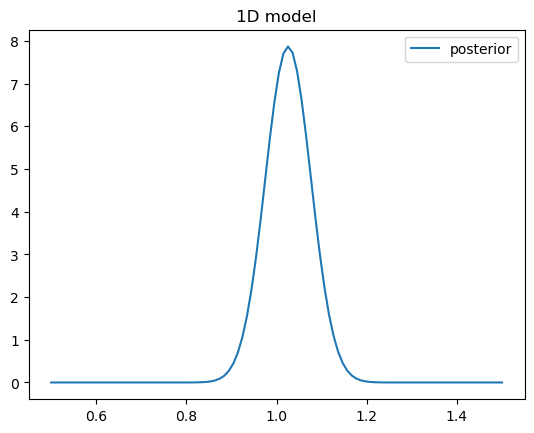

1.0


In [97]:
### linear model
def linear_model(theta, x):
    return theta[0] * x + intercept

### log-like model
def logL(theta, data2):
    x, y, sigma_y = data2
    y_fit = linear_model(theta, x)
    return sum(scipy.stats.norm.logpdf(y_val, loc=y_fit_val, scale=sigma_y_val) 
               for y_val, y_fit_val, sigma_y_val in zip(y, y_fit, sigma_y)) # return part is gpt-modified

### posterior on linear
def posterior_linear(theta, data2):
    prior = 1 / (1.5 - 0.5)
    return np.exp(logL([theta], data2)) * prior

### parameter for plot
theta_vals = np.linspace(0.5, 1.5, 100)
posterior_vals = np.array([posterior_linear(theta, data2) for theta in theta_vals])
posterior_vals /= np.sum(posterior_vals) * (theta_vals[1] - theta_vals[0]) # normalise

### plot
plt.plot(theta_vals, posterior_vals, label='posterior')
plt.title('1D model')
plt.legend()
plt.show()


### adding evidence thingy
evidence_linear = np.sum(posterior_vals) * (theta_vals[1] - theta_vals[0])
print(evidence_linear)


3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

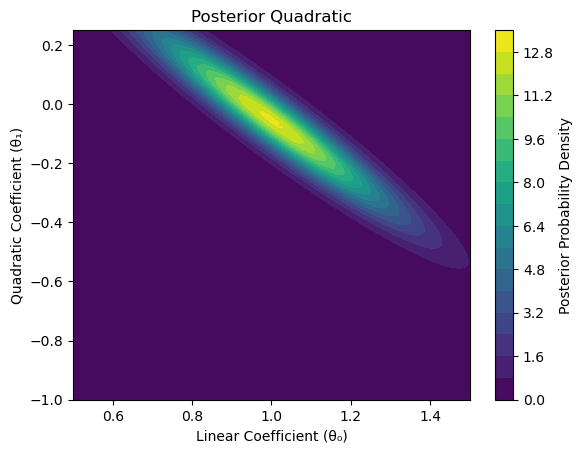

In [103]:
#### quadratic model
def quadratic_model(theta, x):
    return theta[0] * x + theta[1] * x**2 + intercept

### log-likelihood quadratic
def logL_quadratic(theta, data2):
    x, y, sigma_y = data2
    y_fit = quadratic_model(theta, x)
    return sum(scipy.stats.norm.logpdf(y_val, loc=y_fit_val, scale=sigma_y_val) 
               for y_val, y_fit_val, sigma_y_val in zip(y, y_fit, sigma_y))

### posterior quacratic
def posterior_quadratic(theta, data2):
    prior_0 = 1 / (1.5 - 0.5)  # Uniform prior for the linear coefficient
    prior_1 = 1 / (0.25 + 1)  # Uniform prior for the quadratic coefficient
    return np.exp(logL_quadratic(theta, data2)) * prior_0 * prior_1


theta_0_vals = np.linspace(0.5, 1.5, 100)
theta_1_vals = np.linspace(-1, 0.25, 100)

### posterior 2D
posterior_2d = np.zeros((len(theta_0_vals), len(theta_1_vals)))
for i, theta_0 in enumerate(theta_0_vals):
    for j, theta_1 in enumerate(theta_1_vals):
        posterior_2d[i, j] = posterior_quadratic([theta_0, theta_1], data2)

posterior_2d /= np.sum(posterior_2d) * (theta_0_vals[1] - theta_0_vals[0]) * (theta_1_vals[1] - theta_1_vals[0])

### plot - gpt modified
plt.contourf(theta_0_vals, theta_1_vals, posterior_2d, 20, cmap='viridis')
plt.colorbar(label='Posterior Probability Density')
plt.title('Posterior Quadratic')
plt.xlabel('Linear Coefficient (θ₀)')
plt.ylabel('Quadratic Coefficient (θ₁)')
plt.show()

### wow!

In [107]:
### evidence thingy!
evidence_quadratic = np.sum(posterior_2d) * (theta_0_vals[1] - theta_0_vals[0]) * (theta_1_vals[1] - theta_1_vals[0])
print(evidence_quadratic)


### Bayesian factor
bayes_factor = evidence_quadratic / evidence_linear
print(bayes_factor)

# ~1 so it's good

0.9999999999999998
0.9999999999999998


<span style="color:red">NP: This is not correct. Please review how to calculate Bayesian evidence. -2 pts </span>